**Cole Turner and Ethan Seal**

Fall 2019

CS343: Neural Networks

Project 0: Scientific Python

**FINAL DUE 11:59pm Tues Sept 10**
- `sci_python.ipynb`

**REMINDER**: Submit rubric on Google Classroom

**REMINDER**: There should be ZERO loops of any kind below!

## Goals

- Refresher of numpy / vectorized programming.
- Get used to ndarray data type, matplotlib, pandas.
- Practice common operations that will come up all semester with simple examples.
- Practice turning in project on filer and rubric on Google Classroom

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1) Common shape operations

1. Create an ndarray of values drawn from a Gaussian mean 0 stdev 0.01 with shape (3, 1, 8, 9)

In [52]:
np.random.seed(0)  # Keep these random seeds for test code purposes

gauss = np.random.normal(0,.01, (3,1,8,9))

print(f'Your shape is {gauss.shape} and should be (3, 1, 8, 9)')
print(f'Your first 3 numbers are {gauss[0,0,0,:3]} and should be [0.018, 0.004, 0.01]')

Your shape is (3, 1, 8, 9) and should be (3, 1, 8, 9)
Your first 3 numbers are [0.018 0.004 0.01 ] and should be [0.018, 0.004, 0.01]


2. Reshape your array so that it has a leading singleton dimension

In [53]:
gauss = gauss[np.newaxis,:]
print(f'Your shape is {gauss.shape} and should be (1, 3, 1, 8, 9)')

Your shape is (1, 3, 1, 8, 9) and should be (1, 3, 1, 8, 9)


3. Remove singleton dimensions

In [56]:
gauss = np.squeeze(gauss)
print(f'Your shape is {gauss.shape} and should be (3, 8, 9)')

Your shape is (3, 8, 9) and should be (3, 8, 9)


4. Reshape your ndarray to merge non-leading dimensions. No hard coding!

In [57]:

gauss = gauss.reshape([gauss.shape[0], np.prod(gauss.shape[1:])])
print(f'Your shape is {gauss.shape} and should be (3, 72)')
print(f'Your 2nd row of 1st 3 numbers is {gauss[1,:3]} and should be [0.011 -0.012  0.004]')

(3, 8, 9)
Your shape is (3, 72) and should be (3, 72)
Your 2nd row of 1st 3 numbers is [ 0.011 -0.012  0.004] and should be [0.011 -0.012  0.004]


5. Print the number of total elements in `gauss`

In [60]:
print(f'Size of gauss: {gauss.size}')
print('You should get 216.')

Size of gauss: 216
You should get 216.


6. Figure out how to permute (swap) the dimensions of the ndarray `x` in the cell below from shape=(5, 2, 3) to (3, 5, 2). You should do this in one line of code and is relatively simple. *The long text below is just to give you an intuition why this problem will come up in class this semester when working with image data.*

**Intuition:** There is a 5x2 grid of RGB triplets (i.e. 5x2x3): `[(R1,G1,B1), (R2,G2,B2)], [(R1,G1,B1), (R2,G2,B2)], ...`. We want to shuffle this up so that all the R values in the pairs of RGB values are grouped next to each other (every other element down the 1st column of the original `x` array). We also want the R values for the 1st element of the RGB pair to be next to each other (in 1st column of result), and the R values for the 2nd element of the RGB pair to be next to each other (in 2nd column of result).

**Visually**:

Original `x`:

    array([[[ 1.764,  0.4  ,  0.979],
            [ 2.241,  1.868, -0.977]],

           [[ 0.95 , -0.151, -0.103],
            [ 0.411,  0.144,  1.454]],

           [[ 0.761,  0.122,  0.444],
            [ 0.334,  1.494, -0.205]],

           [[ 0.313, -0.854, -2.553],
            [ 0.654,  0.864, -0.742]],

           [[ 2.27 , -1.454,  0.046],
            [-0.187,  1.533,  1.469]]])
    
 
Answer `x_p`:

    array([[[ 1.764,  2.241],
            [ 0.95 ,  0.411],
            [ 0.761,  0.334],
            [ 0.313,  0.654],
            [ 2.27 , -0.187]],

           [[ 0.4  ,  1.868],
            [-0.151,  0.144],
            [ 0.122,  1.494],
            [-0.854,  0.864],
            [-1.454,  1.533]],

           [[ 0.979, -0.977],
            [-0.103,  1.454],
            [ 0.444, -0.205],
            [-2.553, -0.742],
            [ 0.046,  1.469]]])
            
**In terms of the RGB pixels:**
    
        
    [R1, G1, B1]
    [R2, G2, B2]
    [R1, G1, B1]
    [R2, G2, B2]
    ...
    
    to:
    
    [R1, R2]
    [R1, R2]
    [R1, R2]
    [R1, R2]
    [B1, B2]
    [B1, B2]
    [B1, B2]
    [B1, B2]
    ...

In [97]:
# don't change this (but do execute it). This is for test code
x_p_sol = np.array([[[ 1.764,  2.241],
            [ 0.95 ,  0.411],
            [ 0.761,  0.334],
            [ 0.313,  0.654],
            [ 2.27 , -0.187]],

           [[ 0.4  ,  1.868],
            [-0.151,  0.144],
            [ 0.122,  1.494],
            [-0.854,  0.864],
            [-1.454,  1.533]],

           [[ 0.979, -0.977],
            [-0.103,  1.454],
            [ 0.444, -0.205],
            [-2.553, -0.742],
            [ 0.046,  1.469]]])

In [111]:
np.random.seed(0)  # keep me
x = np.random.randn(5, 2, 3)

x_p = np.transpose(x,(2,0,1))

print(f'The shape of x_p is {x_p.shape} and should be (3, 5, 2)')
print('Your array below should match x_p above:\n', x_p)
print(f'...and they match? {np.allclose(x_p_sol, x_p, rtol=1e-1)}')

The shape of x_p is (3, 5, 2) and should be (3, 5, 2)
Your array below should match x_p above:
 [[[ 1.764  2.241]
  [ 0.95   0.411]
  [ 0.761  0.334]
  [ 0.313  0.654]
  [ 2.27  -0.187]]

 [[ 0.4    1.868]
  [-0.151  0.144]
  [ 0.122  1.494]
  [-0.854  0.864]
  [-1.454  1.533]]

 [[ 0.979 -0.977]
  [-0.103  1.454]
  [ 0.444 -0.205]
  [-2.553 -0.742]
  [ 0.046  1.469]]]
...and they match? True


7. The following ndarray has a `uint8` datatype (`dtype` in numpy parlance). Cast the ndarray into a `float64` dtype, then normalize the values so that the min is 0 and max is 255.

Data from images often comes in as `uint8` (0 to 255 ints) but neural networks tend to work with continuous real values, and best with normalized inputs.

In [120]:
u = np.uint8([10, 0, 13, 255, 200, 14])
u = u.astype(float)
u *= (255.0/u.max())/255.0
print(f'The min is {u.min()}, the max is {u.max()}. They should be 0.0 and 1.0')
print(f'The type is {u.dtype} and should be float64.')

The min is 0.0, the max is 1.0. They should be 0.0 and 1.0
The type is float64 and should be float64.


## Task 2) Matrix multiplication and operations

1. Define ndarray `a` of all 2s (shape=(10,20)). Define ndarray `b` of ints 0 thru 9 (shape=(10)), no hard coding!

In [118]:

print(f'Your a shape is {a.shape}, and should be (10, 20).')
print(f'All your a values == 2? {np.all(a == 2)}')
print(f'Your b shape is {b.shape}, and should be (10,).')
print(f'Min of b is 0? {b.min() == 0}. Max of b is 9? {b.max() == 9}')

NameError: name 'a' is not defined

2. Matrix multiply the ndarrays in the order "a times b" a way to get `c` with dimensions (20,). **This should be a one-liner!**

In [ ]:

print(f'Your c shape is {c.shape}, and should be (20,).')
print(f'All your c values == 90? {np.all(c == 90.)}')

3. Sum across your `a` array along the last axis, preserving the number of dimensions

In [ ]:

print(f'Your c shape is {a_sum.shape}, and should be (10,1).')

4. Standardize the following following array in 1 line of code. Recall the equation is $$x_s = \frac{x-\mu}{\sigma}$$

In [ ]:
np.random.seed(0)  # keep me!
x = np.random.uniform(low=10, high=16, size=(5,))

print(f'Your standardized array is\n{x_s}\nand should be\n[-0.193  1.568  0.378 -0.235 -1.518]')

## Task 3) Indexing

1. Replace all values < 0 with -1, all values >= 0 with +1. Can be done with a one-liner.

In [103]:
np.random.seed(0)  # keep me!
rand_vals = np.random.uniform(low=-5, high=6, size=(10, 10))

print(f'Number of -1s is {np.count_nonzero(rand_vals == -1)} and should be 47.')
print(f'Number of +1s is {np.count_nonzero(rand_vals == 1)} and should be 53.')

Number of -1s is 0 and should be 47.
Number of +1s is 0 and should be 53.


2. Use logical indexing to select values greater than 10, assign them to a new variable `x_10`

In [104]:
x = np.arange(13)

print(f'Values > 10 are: {x_10} and should be [11 12]')

NameError: name 'x_10' is not defined

3. Figure out how to convert (row, col) **subscript (tuple) indices** to a **linear (flat) index**. *Hint*: This is a Numpy function that does the math. It should work on the following test case:

(row, col) = (5, 5) in an ndarray with shape=(10, 50). 

In [2]:
row, col = 5, 5

print(f'Your linear index is {linInd} and should be 255')

5

4. Figure out how to go in the other direction, go from linear index to subscript index. It should work on the following test case:

The linear index 255 maps to (row, col) = (5, 5) in an ndarray with shape=(10, 50). 

In [ ]:
linInd = 255

print(f'Your subscripts are {subs} and should be (5, 5)')

5. Use column `arange` indexing to make the 1st 3 rows of the first column 1s and rows 4-6 of the second column 1s.

The cell below should print:

    [[1. 0. 0.]
     [1. 0. 0.]
     [1. 0. 0.]
     [0. 1. 0.]
     [0. 1. 0.]
     [0. 1. 0.]]

In [ ]:
x = np.zeros([6, 3])

print(x)

6. In one line of code (using indexing), assign 1s between the rows and columns 25-35 (inclusive).

In [105]:
x = np.zeros((50, 50))
x = np.put(x,[25:35],1)
print(f'No rouge elements in your array? {np.all(np.unique(x) == np.array([0, 1]))}')
print(f'Total number of 1s correct? {np.sum(x) == 121}')

SyntaxError: invalid syntax (<ipython-input-105-0d7fe979acdb>, line 2)

7. Reverse elements in the following ndarray in axes 2 and 3 only (counting from 0).

In [ ]:
np.random.seed(0)
x = np.random.randn(10, 11, 12, 13, 14)

print('Your 1st 2 elements of the result in each dim (flattened) are\n', x[:2, :2, :2, :2, :2].flatten())
print('They should be')
x_sol = np.array([ 0.252,  2.286, -0.966, -0.724, -1.26 ,  0.029, -0.334, -0.02 ,
       -0.212,  0.267, -0.976,  0.024,  1.838, -0.984,  0.029,  0.56 ,
        1.891, -0.736, -0.301,  0.908, -1.477, -0.071,  0.537,  0.455,
        1.224, -1.231,  1.148, -1.253,  0.009, -0.642, -0.998, -0.619])
print(x_sol)

## Task 4) Plotting and loading data

1. Use matplotlib to create a nicely formatted plot of $sin(x)$ and $cos(x)$ evaluated from -10 to 10. Choose an x sampling rate so that the curves look smooth (**no jagged edges!!**). Make sure to


- make $sin(x)$ red and dashed
- make $cos(x)$ blue and dotted
- set the y range in view to -3 to 3.
- include a legend
- include x and y axis labels
- include a title

Executing the cell below should generate the plot include WITHOUT any weird outputs about plot object

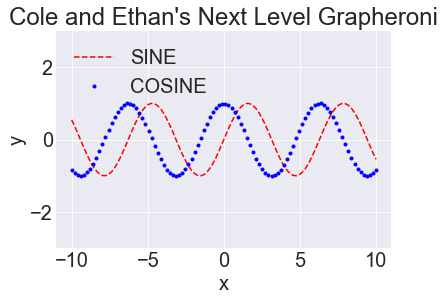

In [132]:
x = np.linspace(-10, 10,100)
plt.plot(x, np.sin(x), 'r--', label="SINE")
plt.plot(x, np.cos(x), 'b.', label="COSINE")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-3, 3])
plt.title('Cole and Ethan\'s Next Level Grapheroni')
plt.legend()
plt.show()

2. Use `pandas` to download and open the Iris dataset over the internet (should run if data CSV file NOT present in your working directory). Create a DataFrame object `df` with the 1st two features and the species names (currently strings) coded categorically as ints.

The url for the data is: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Note that the above file does not include any headers and is in CSV format.

In [ ]:

print(f'The first row is {df.iloc[0,:].to_numpy()} and should be [5.1 3.5 0. ]')
print(f'The last row is {df.iloc[-1,:].to_numpy()} and should be [5.9 3.  2. ]')

3. Convert the DataFrame to a ndarray and create a scatter plot of `df`. Color the points by their class label. The default white/gray/black color scheme is fine.


- Superimpose the line y = x - 2.25.
- Make the line colored red.
- Restrict the x bounds to [4, 8]
- Restrict the y bounds to [2, 5]

Executing the cell below should generate the plot include WITHOUT any weird outputs about plot object

4. Create a 2x2 grid of scatter plots with the following contents:


- (0,0): 2D Uniform random data
- (0,1): 2D isotropic (symmetric blob) Gaussian random data
- (1,0): 2D anisotropic (blob stretched out in a direction) Gaussian random data. Disregard RuntimeWarning messages if you are able to get the plot to look right.
- (1,1): The iris scatter plot
- Give your panels the titles: a, b, c, d.

Make the figure large enough to be legible